In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("spam.csv")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2980,ham,7 wonders in My WORLD 7th You 6th Ur style 5th...,NaN,NaN,NaN
217,ham,Easy ah?sen got selected means its good..,NaN,NaN,NaN
1610,ham,I'll probably be around mu a lot,NaN,NaN,NaN
3915,ham,Ok. C u then.,NaN,NaN,NaN
4473,spam,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# 1. Data Cleaning

In [7]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# rename column name
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# encoding target variable
import sklearn
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
encoder.fit_transform(df['target'])  # spam:1 , ham:0

array([0, 0, 1, ..., 0, 0, 0])

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head() # spam:1 , ham:0

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# check for duplicate values
df.duplicated().sum()

403

In [17]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

# 2. EDA

In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

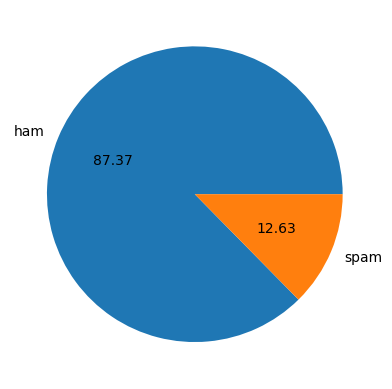

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [22]:
# Pie charts shows Data is Imbalanced

In [36]:
!pip install nltk
import nltk

In [42]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Mukesh
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [25]:
# number of character
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [26]:
df['num_character'] = df['text'].apply(len)

In [27]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [43]:
# number of words
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [44]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [45]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [46]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [47]:
# count of sentence
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [48]:
df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [49]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [50]:
df.head()

,target,text,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [51]:
df[['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [55]:
df.loc[df['target'] == 0,['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [56]:
df.loc[df['target'] == 1,['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [57]:
import seaborn as sns

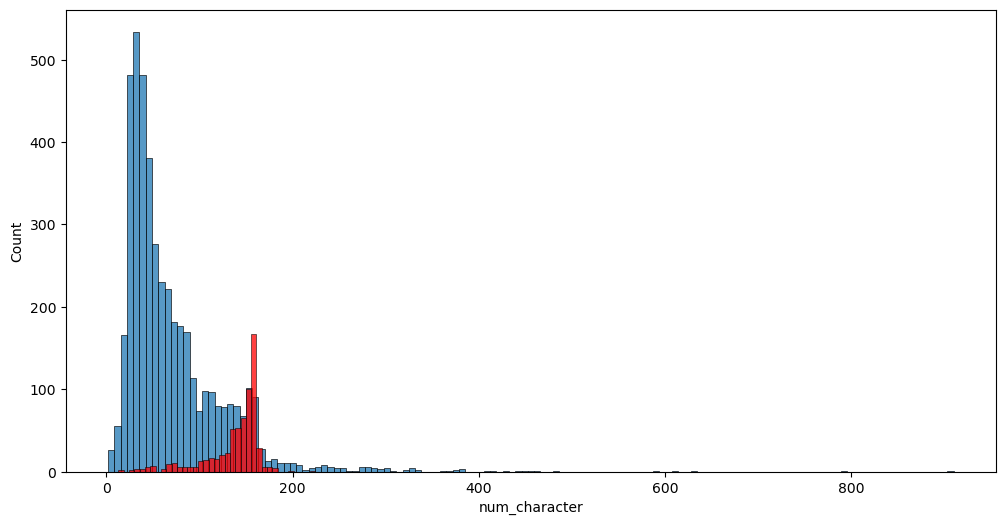

In [81]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')
plt.show()

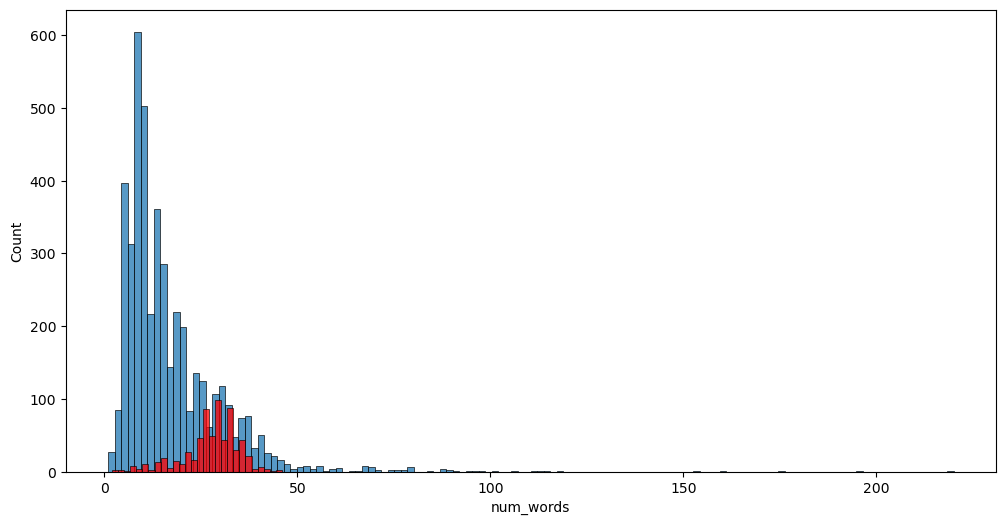

In [82]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')
plt.show()

In [88]:
# correlation
df.select_dtypes(include='number').corr()

,target,num_character,num_words,num_sentence
target,1.000000,0.384717,0.262912,0.263939
num_character,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


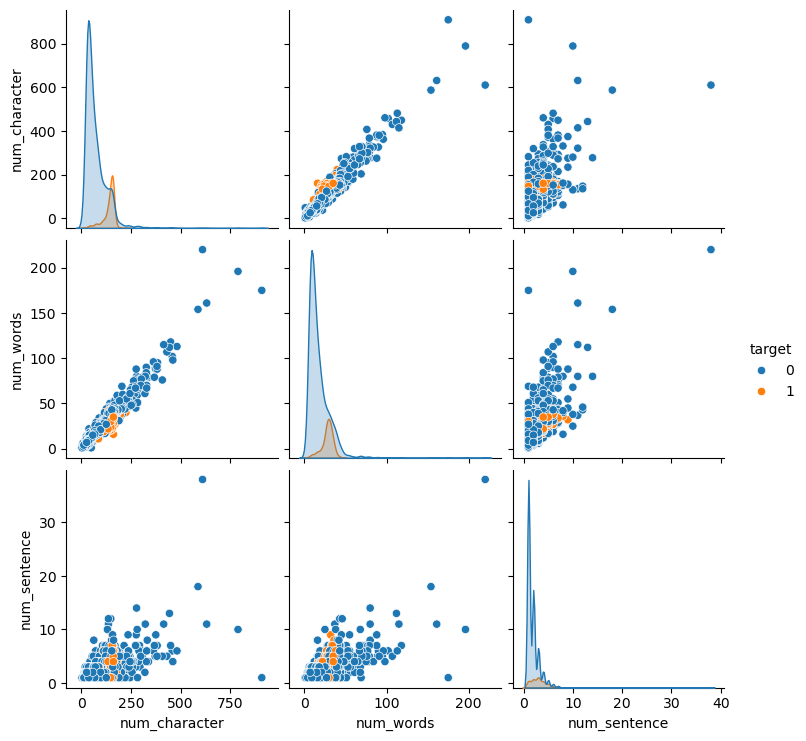

In [85]:
sns.pairplot(df,hue='target')
plt.show()

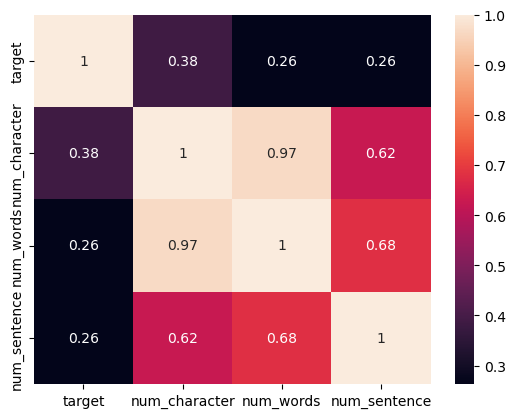

In [92]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)
plt.show()

# 3. Data Preprocessing
* lower case
* tokenization
* removing special character
* removing stop words and punctuation
* stemming

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

In [ ]:
import string

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [168]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [94]:
# lower case
transform_text("HELLO WORD")

'hello word'

In [96]:
# tokenize
transform_text('Hello my name is NLP')

['hello', 'my', 'name', 'is', 'nlp']

In [100]:
# removing special character
transform_text("Hello @my name &is NLP## @@")

['hello', 'my', 'name', 'is', 'nlp']

In [103]:
# stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Mukesh
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [104]:
# punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [165]:
transform_text("This is an example, where you can see how the stop words are used in a sentence!")

['exampl', 'see', 'stop', 'word', 'use', 'sentenc']

In [166]:
transform_text("Although it was raining, she decided to go for a walk in the park, because she had been sitting inside all day and needed some fresh air.")

['although',
 'rain',
 'decid',
 'go',
 'walk',
 'park',
 'sit',
 'insid',
 'day',
 'need',
 'fresh',
 'air']

In [158]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [169]:
transform_text("This is an example, where you can see how the stop words are used in a sentence!")

'exampl see stop word use sentenc'

In [170]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [171]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [172]:
df['transformed_text'] = df['text'].apply(transform_text)

In [173]:
df.head()

,target,text,num_character,num_words,num_sentence,transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [278]:
import wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [279]:
spam_wc = wc.generate(df[df['target']==1]['transform'].str.cat(sep=" "))

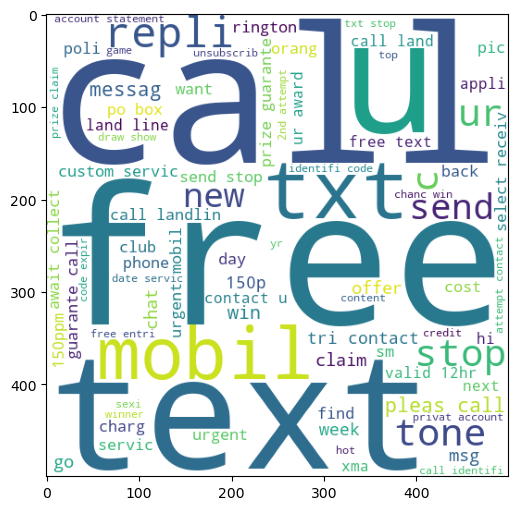

In [280]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

In [281]:
ham_wc = wc.generate(df[df['target']==0]['transform'].str.cat(sep=" "))

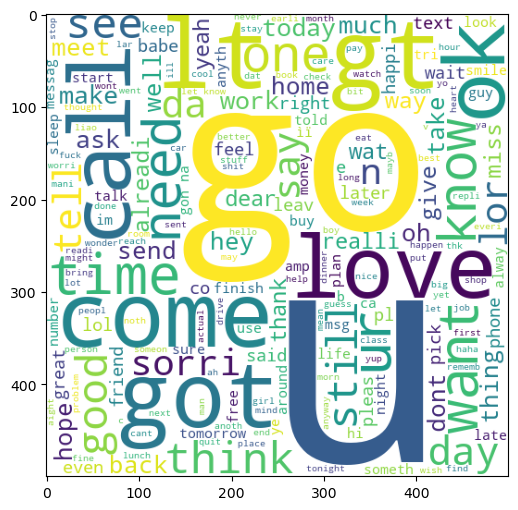

In [282]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.show()

In [284]:
spam_corpus = []
for msg in df[df['target']==1]['transform'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [286]:
len(spam_corpus)

9939

In [287]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

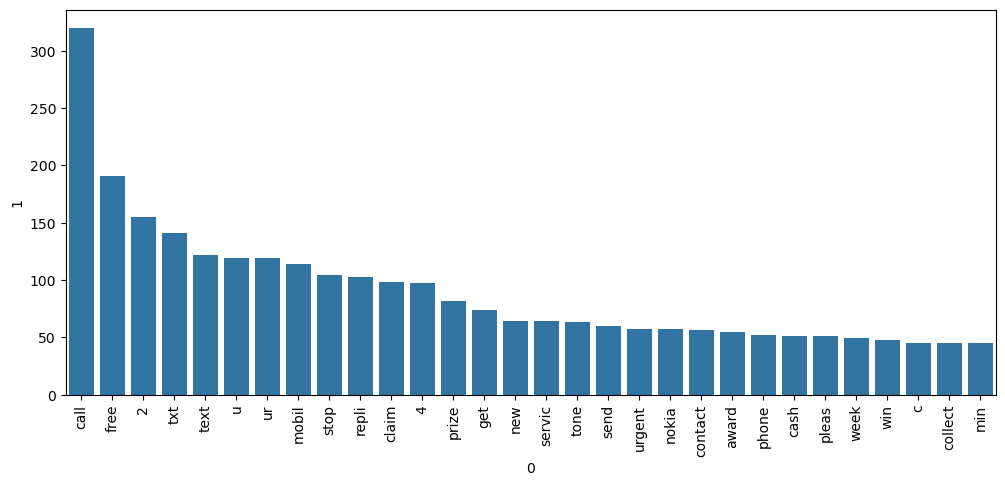

In [297]:
plt.figure(figsize=(12,5))
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [304]:
ham_corpus = []
for msg in df[df['target']==0]['transform'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [305]:
len(ham_corpus)

35404

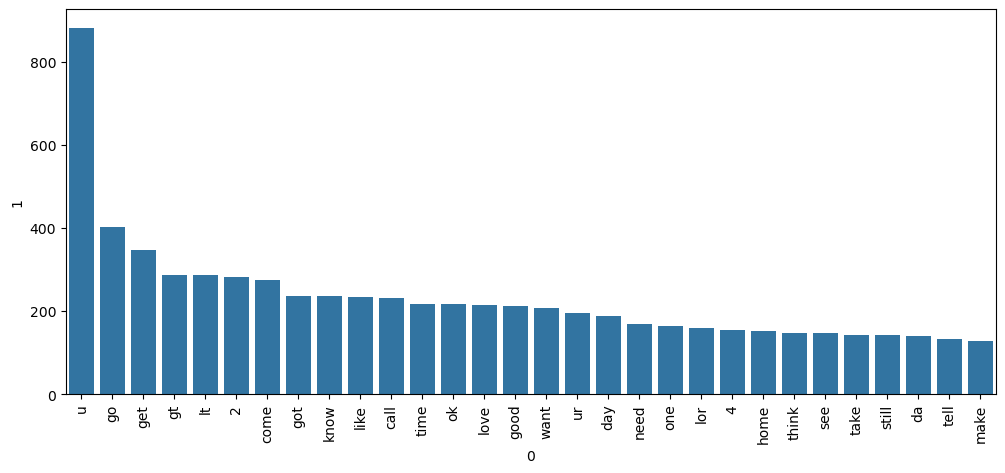

In [306]:
plt.figure(figsize=(12,5))
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [383]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

### CountVectorizer

In [338]:
X = cv.fit_transform(df['transform']).toarray()

In [339]:
X.shape

(5169, 6708)

In [340]:
y = df['target'].values

In [341]:
from sklearn.model_selection import train_test_split

In [342]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [343]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score 

In [344]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [345]:
gnb.fit(X_train,y_train)
y_predict1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_predict1))
print(confusion_matrix(y_test,y_predict1))
print(precision_score(y_test,y_predict1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [346]:
mnb.fit(X_train,y_train)
y_predict2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_predict2))
print(confusion_matrix(y_test,y_predict2))
print(precision_score(y_test,y_predict2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [347]:
bnb.fit(X_train,y_train)
y_predict3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_predict3))
print(confusion_matrix(y_test,y_predict3))
print(precision_score(y_test,y_predict3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


### tfidf

In [384]:
X1 = tfidf.fit_transform(df['transform']).toarray()

In [385]:
X1.shape

(5169, 3000)

In [386]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y_train,y_test = train_test_split(X1,y,test_size=0.2,random_state=2)


In [387]:
gnb.fit(X1_train,y_train)
y_predict1 = gnb.predict(X1_test)
print(accuracy_score(y_test,y_predict1))
print(confusion_matrix(y_test,y_predict1))
print(precision_score(y_test,y_predict1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [388]:
mnb.fit(X1_train,y_train)
y_predict2 = mnb.predict(X1_test)
print(accuracy_score(y_test,y_predict2))
print(confusion_matrix(y_test,y_predict2))
print(precision_score(y_test,y_predict2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [389]:
bnb.fit(X1_train,y_train)
y_predict3 = bnb.predict(X1_test)
print(accuracy_score(y_test,y_predict3))
print(confusion_matrix(y_test,y_predict3))
print(precision_score(y_test,y_predict3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [390]:
# choosing tfidf----> mnb

### other algorithm

In [391]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [371]:
!pip install xgboost
from xgboost import XGBClassifier

In [392]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [393]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [394]:
def train_classifier(clf,X1_train,y_train,X1_test,y_test):
    clf.fit(X1_train,y_train)
    y_pred = clf.predict(X1_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [395]:
train_classifier(svc,X1_train,y_train,X1_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [396]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X1_train,y_train,X1_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


D:\Anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655


In [397]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [398]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [399]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [400]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


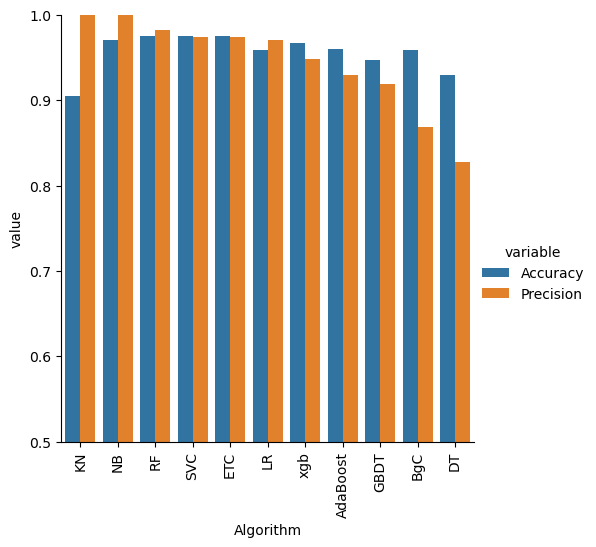

In [401]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# model improve
### 1. Change the max_features parameter of TfIdf

In [402]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [408]:
temp_df

,Algorithm,Accuracy_scaling,Precision_scaling
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [409]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))